In [32]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


In [33]:
NUM_SIMS = 1000
BIN_SIZE_MATCHES = 1
BIN_SIZE_LIKES = 1

In [34]:
df = pd.read_csv('../results/results_sim4.csv')

In [35]:
MALE_COUNT = sum(df['gender'] == 'MALE')/NUM_SIMS
FEMALE_COUNT = sum(df['gender'] == 'FEMALE')/NUM_SIMS

In [36]:
df['attractiveness_tier'] = [math.floor(x*100/10) for x in df['attractiveness']]

In [37]:
df.groupby(['gender']).mean()[['likes','matches']]

,likes,matches
gender,,
FEMALE,92.286574,6.472411
MALE,7.016493,3.231354


In [38]:
df.groupby(['gender']).median()[['likes','matches']]

,likes,matches
gender,,
FEMALE,89.0,6.0
MALE,1.0,0.0


In [39]:
df.groupby(['gender','attractiveness_tier']).mean()[['likes','matches']]

likes    matches
gender attractiveness_tier                       
FEMALE 0                      6.146206   0.427889
       1                     21.677052   1.521642
       2                     39.397698   2.759321
       3                     58.365127   4.081892
       4                     78.481156   5.506041
       5                     99.203845   6.959739
       6                    120.728582   8.478842
       7                    142.914164  10.025054
       8                    165.478433  11.622156
       9                    188.640633  13.212735
MALE   0                      0.000000   0.000000
       1                      0.000643   0.000314
       2                      0.011760   0.005352
       3                      0.087914   0.039416
       4                      0.393650   0.181566
       5                      1.330873   0.613184
       6                      3.650448   1.683156
       7                      8.709165   4.011456
       8                     18.744110   8.624975
       9                     36.939274  17.017183

In [40]:
df.groupby(['gender']).median()[['likes','matches']]

,likes,matches
gender,,
FEMALE,89.0,6.0
MALE,1.0,0.0


In [41]:
grouped_data = df.groupby(['gender','attractiveness_tier']).mean()[['likes','matches']]

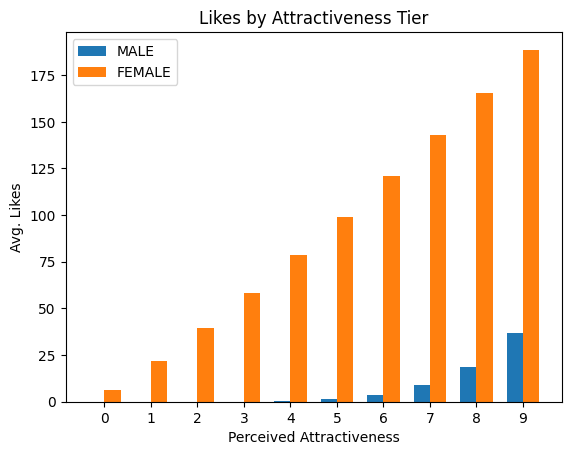

In [42]:

male_data = grouped_data.xs('MALE', level='gender')
female_data = grouped_data.xs('FEMALE', level='gender')

x = male_data.index

bar_width = 0.35
r1 = range(len(x))
r2 = [x + bar_width for x in r1]

plt.bar(r1, male_data['likes'], width=bar_width, label='MALE')
plt.bar(r2, female_data['likes'], width=bar_width, label='FEMALE')

plt.xlabel('Perceived Attractiveness')
plt.ylabel('Avg. Likes')
plt.title('Likes by Attractiveness Tier')

plt.xticks([r + bar_width/2 for r in r1], x)
plt.legend()
plt.show()

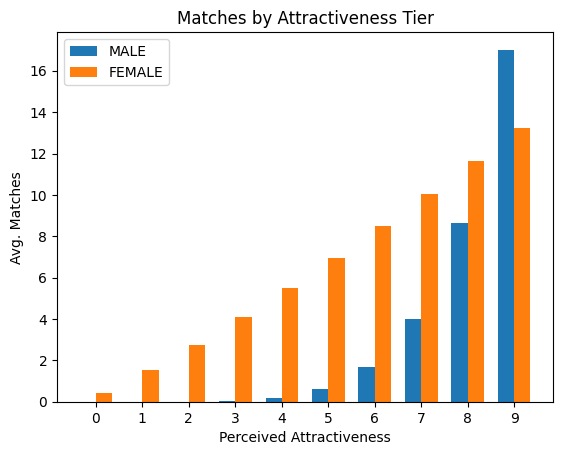

In [43]:

male_data = grouped_data.xs('MALE', level='gender')
female_data = grouped_data.xs('FEMALE', level='gender')

x = male_data.index

bar_width = 0.35
r1 = range(len(x))
r2 = [x + bar_width for x in r1]

plt.bar(r1, male_data['matches'], width=bar_width, label='MALE')
plt.bar(r2, female_data['matches'], width=bar_width, label='FEMALE')

plt.xlabel('Perceived Attractiveness')
plt.ylabel('Avg. Matches')
plt.title('Matches by Attractiveness Tier')

plt.xticks([r + bar_width/2 for r in r1], x)
plt.legend()
plt.show()

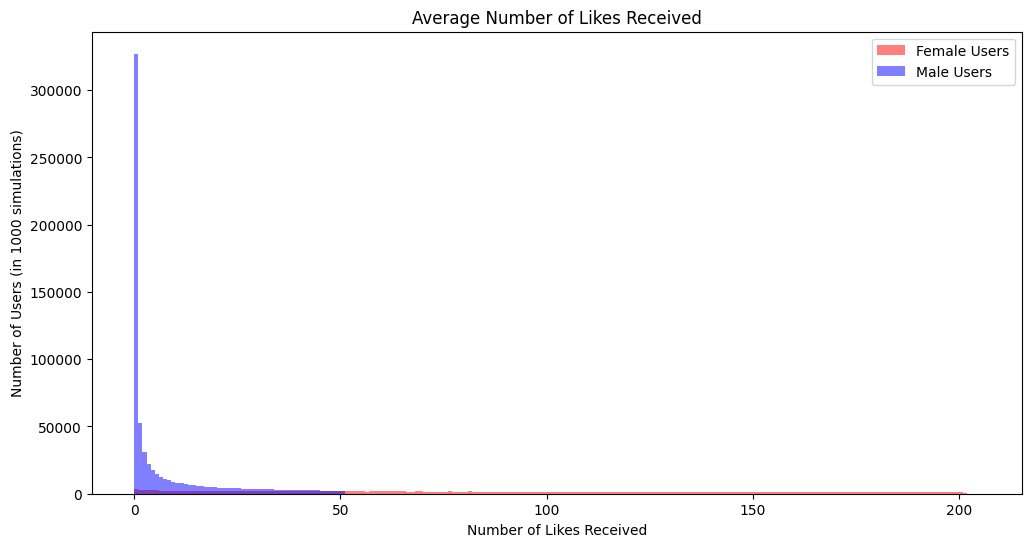

In [44]:
female_likes_total = [x for x in df[df['gender'] == 'FEMALE']['likes']]
male_likes_total = [x for x in df[df['gender'] == 'MALE']['likes']]

def convert_bins_to_size(data_range, X):
    min_val = int(min(data_range))
    max_val = int(max(data_range))
    new_bins = list(range(min_val, max_val + X + 1, X))
    return new_bins

plt.figure(figsize=(12, 6))
data_range = range(int(min(male_likes_total)), int(max(female_likes_total)) + 2)
new_bins_likes = convert_bins_to_size(male_likes_total+female_likes_total, BIN_SIZE_LIKES)
plt.hist(female_likes_total, bins=new_bins_likes, alpha=0.5, label='Female Users', color='red')
plt.hist(male_likes_total, bins=new_bins_likes, alpha=0.5, label='Male Users', color='blue')
plt.title("Average Number of Likes Received")
plt.xlabel("Number of Likes Received")
plt.ylabel("Number of Users (in 1000 simulations)")
plt.legend(loc='upper right')
plt.show()


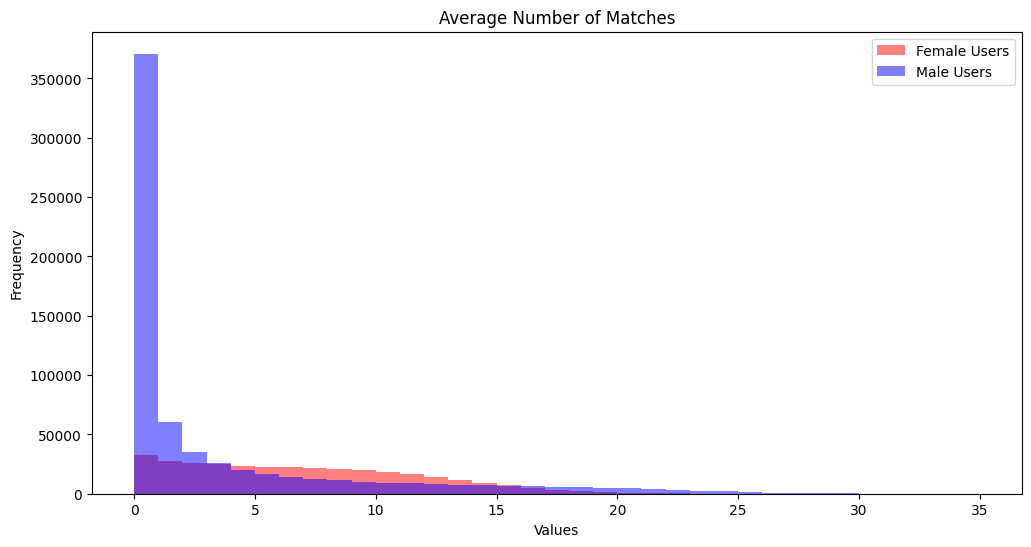

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [45]:
female_matches_total = [x for x in df[df['gender'] == 'FEMALE']['matches']]
male_matches_total = [x for x in df[df['gender'] == 'MALE']['matches']]


plt.figure(figsize=(12, 6))
data_range = range(int(min(male_matches_total)), int(max(female_matches_total)) + 10)
new_bins_matches = convert_bins_to_size(male_matches_total+female_matches_total, BIN_SIZE_MATCHES)
plt.hist(female_matches_total, bins=new_bins_matches, alpha=0.5, label='Female Users', color='red')
plt.hist(male_matches_total, bins=new_bins_matches, alpha=0.5, label='Male Users', color='blue')
plt.title("Average Number of Matches")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()
print(new_bins_matches)

In [17]:
df['bin_matches'] = pd.cut(df['matches'], new_bins_matches, labels=False, right=False)
df['bin_matches_label'] = [str(new_bins_matches[x]) for x in df['bin_matches']]
grouped_data_matches = df.groupby(['gender','bin_matches','bin_matches_label']).count()[['attractiveness']]/NUM_SIMS
df_chart_matches = grouped_data_matches.reset_index()
df_chart_matches = df_chart_matches.rename(columns={'attractiveness': 'count'})
df_chart_matches['percentage'] = df_chart_matches.apply(lambda x: 100*x['count']/(MALE_COUNT*int(x['gender']=='MALE') + FEMALE_COUNT*int(x['gender']=='FEMALE')), axis = 1)
df_chart_matches

,gender,bin_matches,bin_matches_label,count,percentage
0,FEMALE,0,0,32.878,9.873273
1,FEMALE,1,1,27.904,8.379580
2,FEMALE,2,2,25.916,7.782583
3,FEMALE,3,3,24.680,7.411411
4,FEMALE,4,4,23.657,7.104204
...,...,...,...,...,...
59,MALE,30,30,0.113,0.016942
60,MALE,31,31,0.058,0.008696
61,MALE,32,32,0.026,0.003898
62,MALE,33,33,0.013,0.001949
